### IS620 HW 5

In [82]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite as bi
import pandas as pd
from operator import itemgetter

In [83]:
# Get bipartite data
G = nx.davis_southern_women_graph()
women = G.graph['top']
clubs = G.graph['bottom']

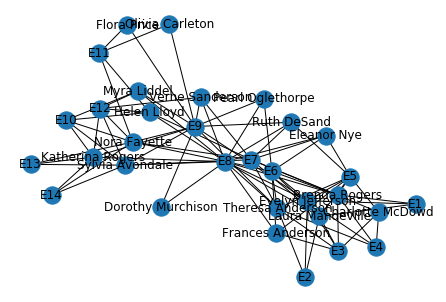

In [84]:
# Initial drawing of bipartate graph showing women and clubs
nx.draw(G, with_labels = True)
plt.show()

# Network is well connected. High degree centrality.  

First lets project the socialite component of the graph, i.e. the Women club attendees and weight their connectedness . . .

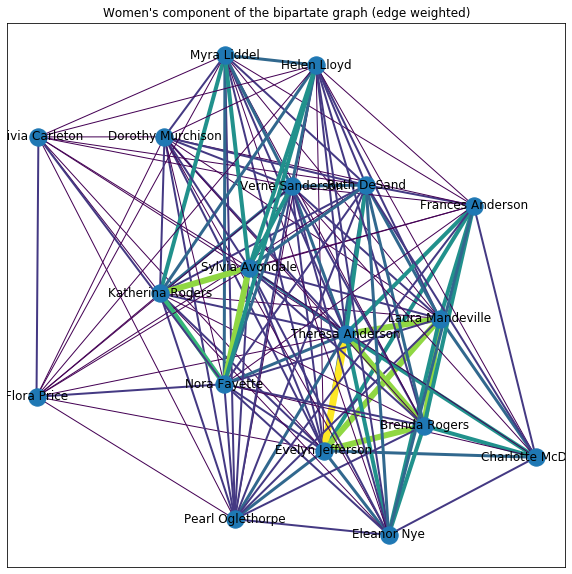

In [85]:
# project weighted graph onto women attendees nodes
W = bi.weighted_projected_graph(G, women, ratio=False)
weights = [edata['weight'] for f,t,edata in W.edges(data=True)]
edge_weights = {(u,v,):d['weight'] * .2 for u,v,d in W.edges(data=True)}

# plot graph
plt.figure(figsize=(10, 10))
plt.title("Women's component of the bipartate graph (edge weighted)")
nx.draw_networkx(W, width = weights, edge_color=weights ) 

There are a few strong ties between club attendees in the center of the graph but we need to 
calculate Centrality statistics and sort in order to rank their importantance . . .

In [104]:
# Get a top 10 list of socialites by betweeness centrality
Wbtw = nx.betweenness_centrality(W)
s = sorted(Wbtw.items(), key=itemgetter(1), reverse=True)
df = pd.DataFrame(s)
df[:10]

,0,1
0,Evelyn Jefferson,0.010122
1,Theresa Anderson,0.010122
2,Ruth DeSand,0.010122
3,Verne Sanderson,0.010122
4,Sylvia Avondale,0.010122
5,Nora Fayette,0.010122
6,Helen Lloyd,0.010122
7,Pearl Oglethorpe,0.005348
8,Myra Liddel,0.005348
9,Katherina Rogers,0.005348


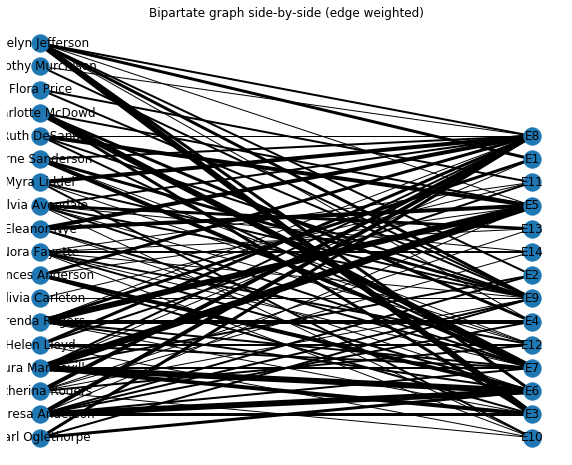

In [79]:
# Show socialite to club event relationships side-by-side
Wx, Cy = bi.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(Wx) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Cy) ) # put nodes from Y at x=2

# plot graph
plt.figure(figsize=(10, 8))
plt.title("Bipartate graph side-by-side (edge weighted)")
nx.draw(G, pos=pos, with_labels = True, width=weights)
plt.show()

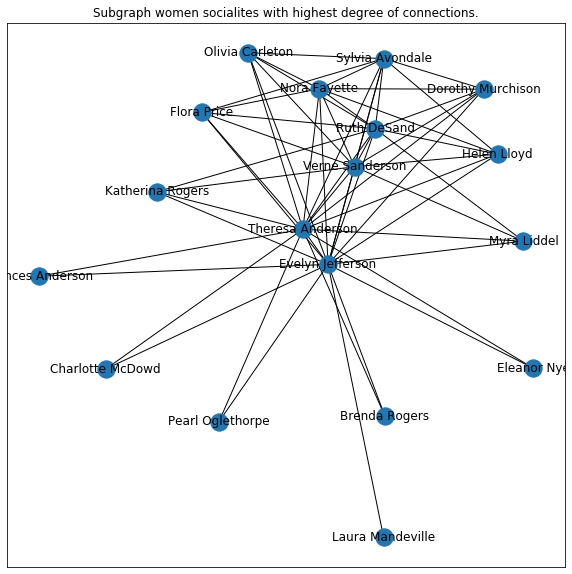

In [105]:
# get the list of top 7 women with highest degree of centrality and plot their connectedness subgraph
highdeg_women = list(df.iloc[:6,0])
hd_women = nx.Graph([(k,v) for k,v in W.edges() if k in highdeg_women])
hd_women.edges()

# plot graph
plt.figure(figsize=(10, 10))
plt.title("Subgraph women socialites with highest degree of connections.")
nx.draw_networkx(hd_women) 


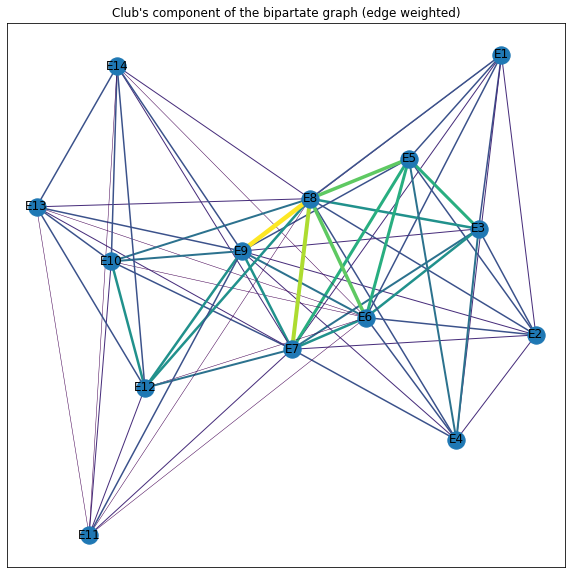

In [91]:
# Now project weighted graph onto club event nodes
C = bi.weighted_projected_graph(G, clubs)
C.edges(data=True)
weights=[edata['weight'] * .5 for f,t,edata in C.edges(data=True)]

# plot graph
plt.figure(figsize=(10, 10))
plt.title("Club's component of the bipartate graph (edge weighted)")
nx.draw_networkx(C, width = weights, edge_color=weights) 

In [92]:
# rank clubs by diminishing attendance
club_degree_dict = dict(C.degree(C.nodes()))
nx.set_node_attributes(C, club_degree_dict, 'degree')
sorted_clubs = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
pd.DataFrame(sorted_clubs)

,0,1
0,E6,13
1,E7,13
2,E8,13
3,E9,13
4,E1,8
5,E2,8
6,E3,8
7,E4,8
8,E5,8
9,E10,8


Lets now plot the edge graph for only the highest degree clubs now . . .

Based upon the subgraphs of the women socialites with the highest degree centrality and the same for the clubs 
the Davis Club Women are a closed centralized group with ~ 7 women that are highly connected between clubs.  There are also ~4 centralized clubs with the most women attendees in commen.

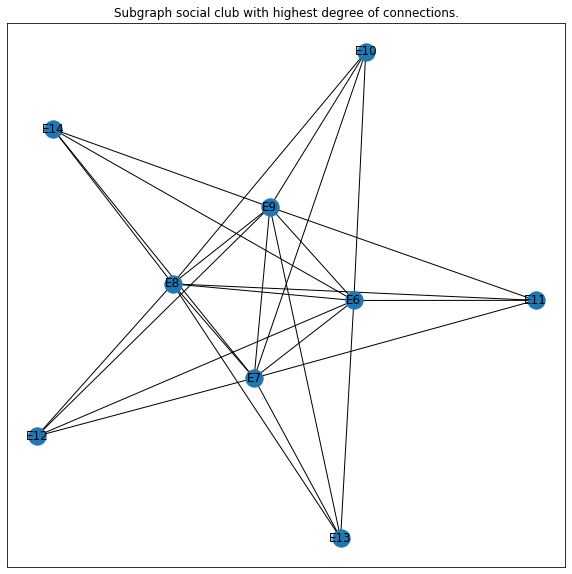

In [100]:
# get the list of top 4 clubs with highest degree of centrality and plot their connectedness subgraph
highdeg_clubs = list(pd.DataFrame(sorted_clubs).iloc[0:4, 0])
hd_clubs = nx.Graph([(k,v) for k,v in C.edges() if k in highdeg_clubs])
hd_clubs.edges()

# plot graph
plt.figure(figsize=(10, 10))
plt.title("Subgraph social club with highest degree of connections.")
nx.draw_networkx(hd_clubs) 